# Formative Assessment
#### Michael NANA KAMENI

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: `data_description.csv` lists the variables or features of the dataset. The file `wind-data.csv` contains the data (`wind-data-truncated.csv` if downloaded from the LMS, due to file size limits).

In [1]:
# Let us import useful libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from plot_lib import plot_data, plot_model, set_default
set_default()

# Display graphics in Jupyter Notebook
%matplotlib inline

Load both the `data_description.csv` and `wind-data.csv` files.

In [2]:
df_desc = pd.read_csv('data_description.csv', sep =';')
df_desc

Variable_name                 Variable_long_name Unit_long_name  \
0            Va2                    Vane_position_2            deg   
1            Ws2                       Wind_speed_2            m/s   
2             Ws                         Wind_speed            m/s   
3           Wa_c  Absolute_wind_direction_corrected            deg   
4           Na_c            Nacelle_angle_corrected            deg   
5             Ot                Outdoor_temperature          deg_C   
6             Yt                Nacelle_temperature          deg_C   
7             Nf                     Grid_frequency             Hz   
8             Nu                       Grid_voltage              V   
9             Rm                             Torque             Nm   
10           Dst       Generator_stator_temperature          deg_C   
11           Git          Gearbox_inlet_temperature          deg_C   
12             Q                     Reactive_power           kVAr   
13          Gb2t      Gearbox_bearing_2_temperature          deg_C   
14          Gost       Gearbox_oil_sump_temperature          deg_C   
15           DCs          Generator_converter_speed            rpm   
16            Wa            Absolute_wind_direction            deg   
17            Ds                    Generator_speed            rpm   
18            Cm                   Converter_torque             Nm   
19            Va                      Vane_position            deg   
20            Ya                      Nacelle_angle            deg   
21            Rs                        Rotor_speed            rpm   
22             S                     Apparent_power            kVA   
23        Cosphi                       Power_factor            NaN   
24            Rt                    Hub_temperature          deg_C   
25            Ba                        Pitch_angle            deg   
26             P                       Active_power             kW   
27           Va1                    Vane_position_1            deg   
28           Ws1                       Wind_speed_1            m/s   
29          Db2t    Generator_bearing_2_temperature          deg_C   
30          Db1t    Generator_bearing_1_temperature          deg_C   
31          Gb1t      Gearbox_bearing_1_temperature          deg_C   
32           Rbt          Rotor_bearing_temperature          deg_C   
33           Pas               Pitch_angle_setpoint            NaN   

                                              Comment  
0                     Second wind vane on the nacelle  
1                    Second anemometer on the nacelle  
2                                  Average wind speed  
3                                                 NaN  
4                                                 NaN  
5                                                 NaN  
6                                                 NaN  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11                                                NaN  
12                                                NaN  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20                                                NaN  
21                                                NaN  
22  Should be the square root of the sum of P squa...  
23                                   Should equal P/S  
24                                                NaN  
25                                                NaN  
26                                      

__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

In [3]:
df = pd.read_csv('wind-data.csv', sep =';', parse_dates = ["Date_time"]) 
df.head()

Wind_turbine_name                  Date_time     Ba_avg     Ba_min  \
0            R80711  2013-01-07 01:20:00+01:00  41.160000  -1.000000   
1            R80711  2013-01-05 22:20:00+01:00  -1.000000  -1.000000   
2            R80711  2013-01-06 08:30:00+01:00  -1.000000  -1.000000   
3            R80711  2013-01-05 21:10:00+01:00  44.990002  44.990002   
4            R80711  2013-01-06 11:20:00+01:00  -0.760000  -1.000000   

      Ba_max  Ba_std  Rt_avg  Rt_min  Rt_max  Rt_std  ...  Pas_max  Pas_std  \
0  44.990002   11.27   12.65    12.0    13.0    0.41  ...      NaN      NaN   
1  -0.870000    0.01   12.95    12.0    13.0    0.16  ...      NaN      NaN   
2  -1.000000    0.00   13.74    13.0    14.0    0.35  ...      NaN      NaN   
3  44.990002    0.00   12.14    12.0    13.0    0.27  ...      NaN      NaN   
4   0.000000    0.40   13.78    13.0    14.0    0.35  ...      NaN      NaN   

    Wa_c_avg  Wa_c_min  Wa_c_max  Wa_c_std   Na_c_avg  Na_c_min  Na_c_max  \
0   37.77000       NaN       NaN       NaN   33.75000       NaN       NaN   
1  313.35001       NaN       NaN       NaN  279.92999       NaN       NaN   
2  241.59000       NaN       NaN       NaN  246.67999       NaN       NaN   
3  280.75000       NaN       NaN       NaN  274.12000       NaN       NaN   
4  293.01001       NaN       NaN       NaN  293.87000       NaN       NaN   

   Na_c_std  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 138 columns]

In [4]:
df.tail() # print out the last five rows

Wind_turbine_name                  Date_time  Ba_avg  Ba_min  Ba_max  \
840375            R80721  2016-02-21 01:10:00+01:00    0.10   -1.00   10.11   
840376            R80790  2014-01-04 01:20:00+01:00   -0.97   -0.99   -0.96   
840377            R80790  2014-01-03 08:30:00+01:00   -0.20   -1.03    6.89   
840378            R80721  2016-03-20 00:50:00+01:00   -1.00   -1.00   -1.00   
840379            R80790  2014-01-03 12:50:00+01:00   -0.97   -1.03    0.89   

        Ba_std  Rt_avg     Rt_min  Rt_max  Rt_std  ...  Pas_max  Pas_std  \
840375    2.27    19.0  18.700001    19.0    0.01  ...      NaN      NaN   
840376    0.00    17.6  17.000000    18.0    0.42  ...      NaN      NaN   
840377    1.38    18.0  18.000000    18.0    0.00  ...      NaN      NaN   
840378    0.00    15.0  15.000000    15.0    0.00  ...      NaN      NaN   
840379    0.13    18.0  18.000000    18.0    0.00  ...      NaN      NaN   

         Wa_c_avg  Wa_c_min  Wa_c_max  Wa_c_std   Na_c_avg  Na_c_min  \
840375  214.03000       NaN       NaN       NaN  214.03000       NaN   
840376  194.64999       NaN       NaN       NaN  200.92999       NaN   
840377  189.13000       NaN       NaN       NaN  194.35001       NaN   
840378   47.27000       NaN       NaN       NaN   47.27000       NaN   
840379  180.17000       NaN       NaN       NaN  179.95000       NaN   

        Na_c_max  Na_c_std  
840375       NaN       NaN  
840376       NaN       NaN  
840377       NaN       NaN  
840378       NaN       NaN  
840379       NaN       NaN  

[5 rows x 138 columns]

In [5]:
df.shape # print out the size of the dataframe.

(840380, 138)

## Exploring Data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [6]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total     Percent
Na_c_std           840380  100.000000
Pas_avg            840380  100.000000
Va1_min            840380  100.000000
Va1_max            840380  100.000000
Va1_std            840380  100.000000
...                   ...         ...
Ws_std               4678    0.556653
Wa_avg               4678    0.556653
Wa_min               4678    0.556653
Date_time               0    0.000000
Wind_turbine_name       0    0.000000

[138 rows x 2 columns]

In [7]:
#Let us Select columns with more than 440380 "NaN" (missing values)
df.loc[:,df.isnull().sum()>=440380]

Va1_avg  Va1_min  Va1_max  Va1_std  Va2_avg  Va2_min  Va2_max  \
0           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
840375      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
840376      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
840377      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
840378      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
840379      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

        Va2_std  Pas_avg  Pas_min  Pas_max  Pas_std  Wa_c_min  Wa_c_max  \
0           NaN      NaN      NaN      NaN      NaN       NaN       NaN   
1           NaN      NaN      NaN      NaN      NaN       NaN       NaN   
2           NaN      NaN      NaN      NaN      NaN       NaN       NaN   
3           NaN      NaN      NaN      NaN      NaN       NaN       NaN   
4           NaN      NaN      NaN      NaN      NaN       NaN       NaN   
...         ...      ...      ...      ...      ...       ...       ...   
840375      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
840376      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
840377      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
840378      NaN      NaN      NaN      NaN      NaN       NaN       NaN   
840379      NaN      NaN      NaN      NaN      NaN       NaN       NaN   

        Wa_c_std  Na_c_min  Na_c_max  Na_c_std  
0            NaN       NaN       NaN       NaN  
1            NaN       NaN       NaN       NaN  
2            NaN       NaN       NaN       NaN  
3            NaN       NaN       NaN       NaN  
4            NaN       NaN       NaN       NaN  
...          ...       ...       ...       ...  
840375       NaN       NaN       NaN       NaN  
840376       NaN       NaN       NaN       NaN  
840377       NaN       NaN       NaN       NaN  
840378       NaN       NaN       NaN       NaN  
840379       NaN       NaN       NaN       NaN  

[840380 rows x 18 columns]

Missing Features:
    - Na_c_avg data desc says na means "no Nacelle angle corrected average"
    - Na_c_min data desc says na means "no Nacelle angle corrected minimum"
    - Na_c_max data desc says na means "no Nacelle angle corrected maximum"
    - Na_c_std data desc says na means "no Nacelle angle corrected standard deviation"
    - Pas_avg data desc says na means "no Pitch angle setpoint average"
    - Pas_min data desc says na means "no Pitch angle setpoint minimum"
    - Pas_max data desc says na means "no Pitch angle setpoint maximum"
    - Pas_std data desc says na means "no Pitch angle setpoint standard deviation"
    - Va1_min data desc says na means "no Vane position 1 minimum"
    - Va1_max data desc says na means "no Vane position 1 maximum"
    - Va1_std data desc says na means "no Vane position 1 standard deviation"
    - Va1_avg data desc says na means "no Vane position 1 average"
    - Va2_min data desc says na means "no Vane position 2 minimum" 
    - Va2_max data desc says na means "no Vane position 2 maximum"
    - Va2_std data desc says na means "no Vane position 2 standard deviation"
    - Va2_avg data desc says na means "no Vane position 2 average"

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


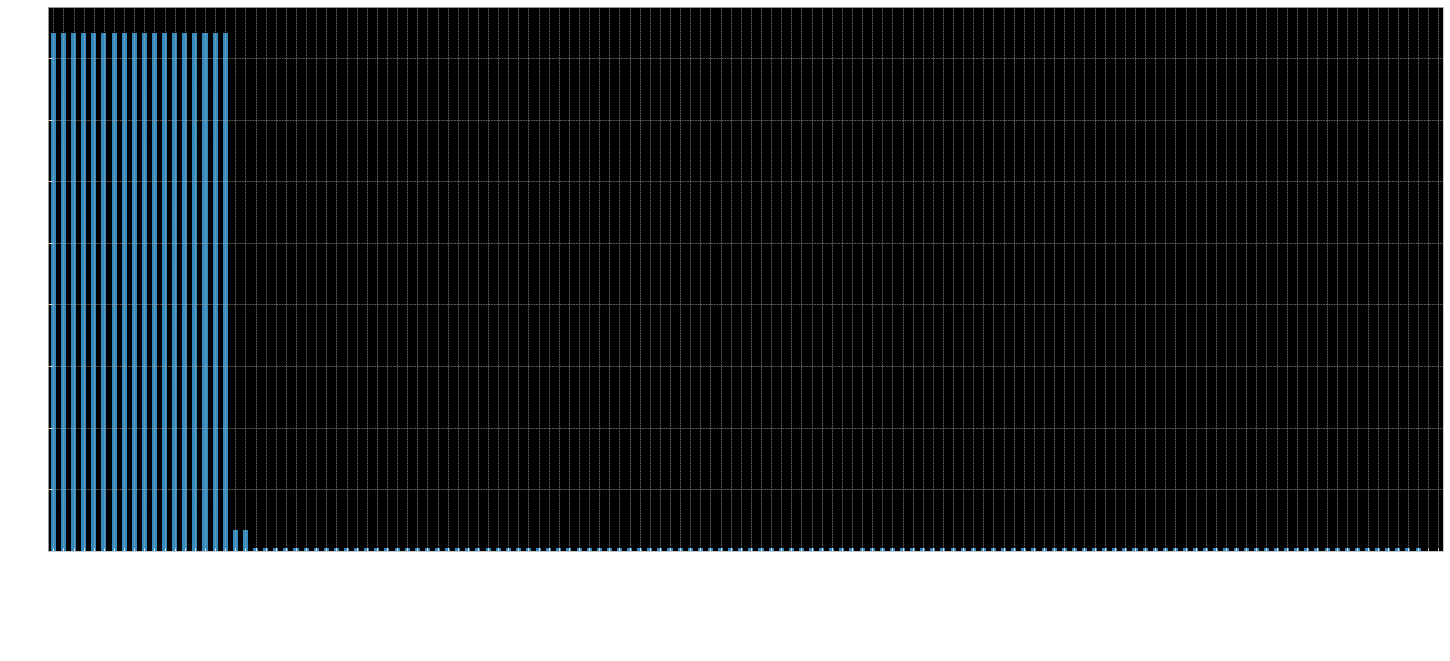

In [8]:
# aggregate all null values 
all_data_na = df.isnull().sum()

# get rid of all the values with NaN missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 'NaN'].index).sort_values(ascending=False)
plt.subplots(figsize =(25, 10))
all_data_na.plot(kind='bar');

In [9]:
# Let us get rid of all the columns with more than 440380 missing values
df.drop(df.loc[:,df.isnull().sum()>=440380], axis=1, inplace=True)

In [10]:
# Checking Categorical Data
df.select_dtypes(include=['object']).columns.values

array(['Wind_turbine_name', 'Date_time'], dtype=object)

In [11]:
# Checking Numerical Data
df.select_dtypes(include=['int64','float64']).columns.values

array(['Ba_avg', 'Ba_min', 'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min',
       'Rt_max', 'Rt_std', 'DCs_avg', 'DCs_min', 'DCs_max', 'DCs_std',
       'Cm_avg', 'Cm_min', 'Cm_max', 'Cm_std', 'P_avg', 'P_min', 'P_max',
       'P_std', 'Q_avg', 'Q_min', 'Q_max', 'Q_std', 'S_avg', 'S_min',
       'S_max', 'S_std', 'Cosphi_avg', 'Cosphi_min', 'Cosphi_max',
       'Cosphi_std', 'Ds_avg', 'Ds_min', 'Ds_max', 'Ds_std', 'Db1t_avg',
       'Db1t_min', 'Db1t_max', 'Db1t_std', 'Db2t_avg', 'Db2t_min',
       'Db2t_max', 'Db2t_std', 'Dst_avg', 'Dst_min', 'Dst_max', 'Dst_std',
       'Gb1t_avg', 'Gb1t_min', 'Gb1t_max', 'Gb1t_std', 'Gb2t_avg',
       'Gb2t_min', 'Gb2t_max', 'Gb2t_std', 'Git_avg', 'Git_min',
       'Git_max', 'Git_std', 'Gost_avg', 'Gost_min', 'Gost_max',
       'Gost_std', 'Ya_avg', 'Ya_min', 'Ya_max', 'Ya_std', 'Yt_avg',
       'Yt_min', 'Yt_max', 'Yt_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max',
       'Ws1_std', 'Ws2_avg', 'Ws2_min', 'Ws2_max', 'Ws2_std', 'Ws_avg',
       'Ws_min', 'Ws_max', '

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


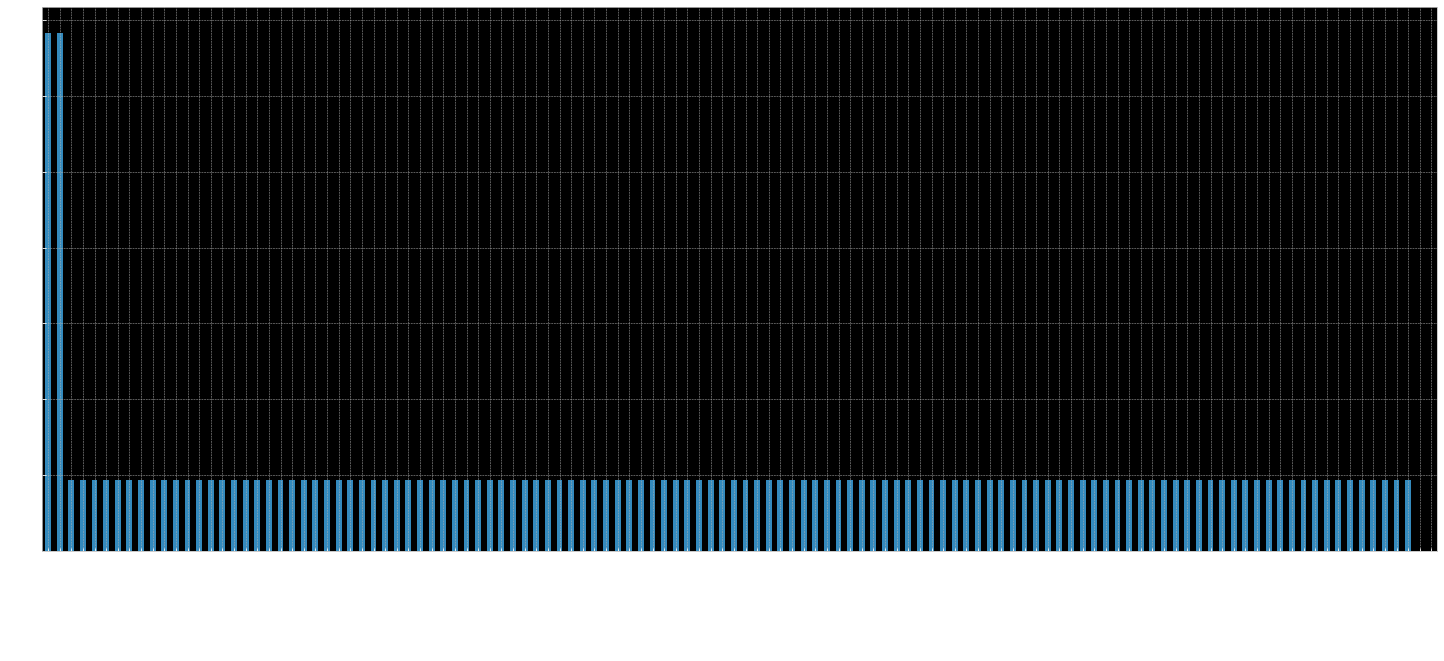

In [12]:
# aggregate all null values 
all_data_na = df.isnull().sum()

# get rid of all the values with NaN missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 'NaN'].index).sort_values(ascending=False)
plt.subplots(figsize =(25, 10))
all_data_na.plot(kind='bar');

In [13]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total   Percent
Na_c_avg           34140  4.062448
Wa_c_avg           34140  4.062448
Gb2t_std            4678  0.556653
Gb2t_max            4678  0.556653
Cosphi_min          4678  0.556653
...                  ...       ...
Ws_std              4678  0.556653
Wa_avg              4678  0.556653
Wa_min              4678  0.556653
Date_time              0  0.000000
Wind_turbine_name      0  0.000000

[120 rows x 2 columns]

In [14]:
df.describe()

Ba_avg         Ba_min         Ba_max         Ba_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       13.881822      12.818985      15.311493       0.841036   
std        28.328039      28.190208      28.865261       3.843590   
min      -121.260000    -131.020000    -121.260000       0.000000   
25%        -0.990000      -1.000000      -0.990000       0.000000   
50%        -0.970000      -0.990000      -0.500000       0.000000   
75%         6.150000      -0.500000      31.095000       0.130000   
max       262.609990     262.609990     262.609990      90.230003   

              Rt_avg         Rt_min         Rt_max         Rt_std  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       19.326442      19.130147      19.549111       0.106878   
std         6.174229       6.184367       6.177361       0.157696   
min         0.000000       0.000000       0.000000       0.000000   
25%        14.060000      14.000000      15.000000       0.000000   
50%        19.000000      19.000000      19.000000       0.000000   
75%        24.000000      24.000000      24.000000       0.210000   
max        39.000000      39.000000      39.180000       4.810000   

             DCs_avg        DCs_min  ...        Rbt_avg        Rbt_min  \
count  835702.000000  835702.000000  ...  835702.000000  835702.000000   
mean     1054.463540     942.379304  ...      27.189282      27.098970   
std       625.201027     591.220101  ...       6.311134       6.314461   
min      -574.900020    -575.020020  ...    -273.200010    -273.200010   
25%       964.010010     290.515008  ...      24.000000      23.900000   
50%      1177.530000    1030.010000  ...      27.889999      27.799999   
75%      1562.450000    1365.030000  ...      31.240000      31.100000   
max      1806.850000    1802.610000  ...     133.550000      46.000000   

             Rbt_max        Rbt_std         Rm_avg         Rm_min  \
count  835702.000000  835702.000000  835702.000000  835702.000000   
mean       27.275192       0.044898    1956.756651    1138.177945   
std         6.336978       0.253097    2240.995240    1452.794345   
min      -273.200010       0.000000    -955.460020   -4316.100100   
25%        24.100000       0.020000      82.990001       0.000000   
50%        28.000000       0.040000    1342.010000     831.835025   
75%        31.299999       0.070000    2851.495000    1952.787500   
max       395.600010     171.649990   10875.700000   10849.900000   

              Rm_max         Rm_std       Wa_c_avg       Na_c_avg  
count  835702.000000  835702.000000  806240.000000  806240.000000  
mean     2874.194418     406.485065     177.514482     178.414719  
std      3126.058454     498.569452      95.730534      96.019437  
min      -765.979980       0.000000       0.000000       0.000000  
25%       436.784997      74.150002      85.239998      86.059998  
50%      1864.010000     228.530000     195.200000     196.710010  
75%      3866.600100     513.287492     247.880000     249.350010  
max     10993.500000    5430.470200     360.000000     360.000000  

[8 rows x 118 columns]

Having a close looked of the summary statistics, we can easily note that there is a large difference between the third quartile and the maximum of each column of the variables. But to confirm let us use boxplot.

In [15]:
df_avg =df[["Ba_avg", "Rbt_avg", "Rm_avg", "Na_c_avg", "Wa_c_avg", "Rs_avg", "Nu_avg", "Nf_avg", "Ot_avg", "Va_avg", "Wa_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Yt_avg", "Ya_avg", "Gost_avg", "Git_avg", "Gb2t_avg", "Gb1t_avg", "Dst_avg", "Db2t_avg", "Db1t_avg", "Ds_avg", "P_avg", "Cosphi_avg", "S_avg", "Q_avg", "DCs_avg", "Rt_avg"]]

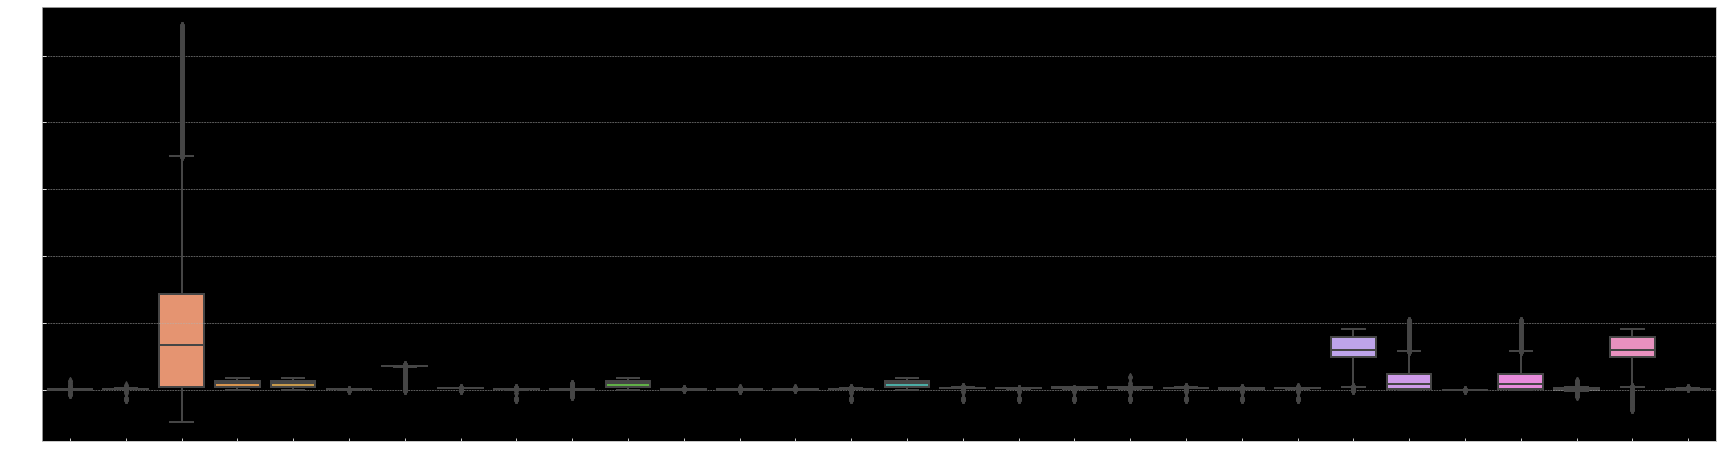

In [16]:
# Let us plot boxplot of the variables
fig, ax = plt.subplots(figsize =(30, 8)) 
sns.boxplot(data=df_avg, order=["Ba_avg", "Rbt_avg", "Rm_avg", "Na_c_avg", "Wa_c_avg", "Rs_avg", "Nu_avg", "Nf_avg", "Ot_avg", "Va_avg", "Wa_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Yt_avg", "Ya_avg", "Gost_avg", "Git_avg", "Gb2t_avg", "Gb1t_avg", "Dst_avg", "Db2t_avg", "Db1t_avg", "Ds_avg", "P_avg", "Cosphi_avg", "S_avg", "Q_avg", "DCs_avg", "Rt_avg"])

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mich

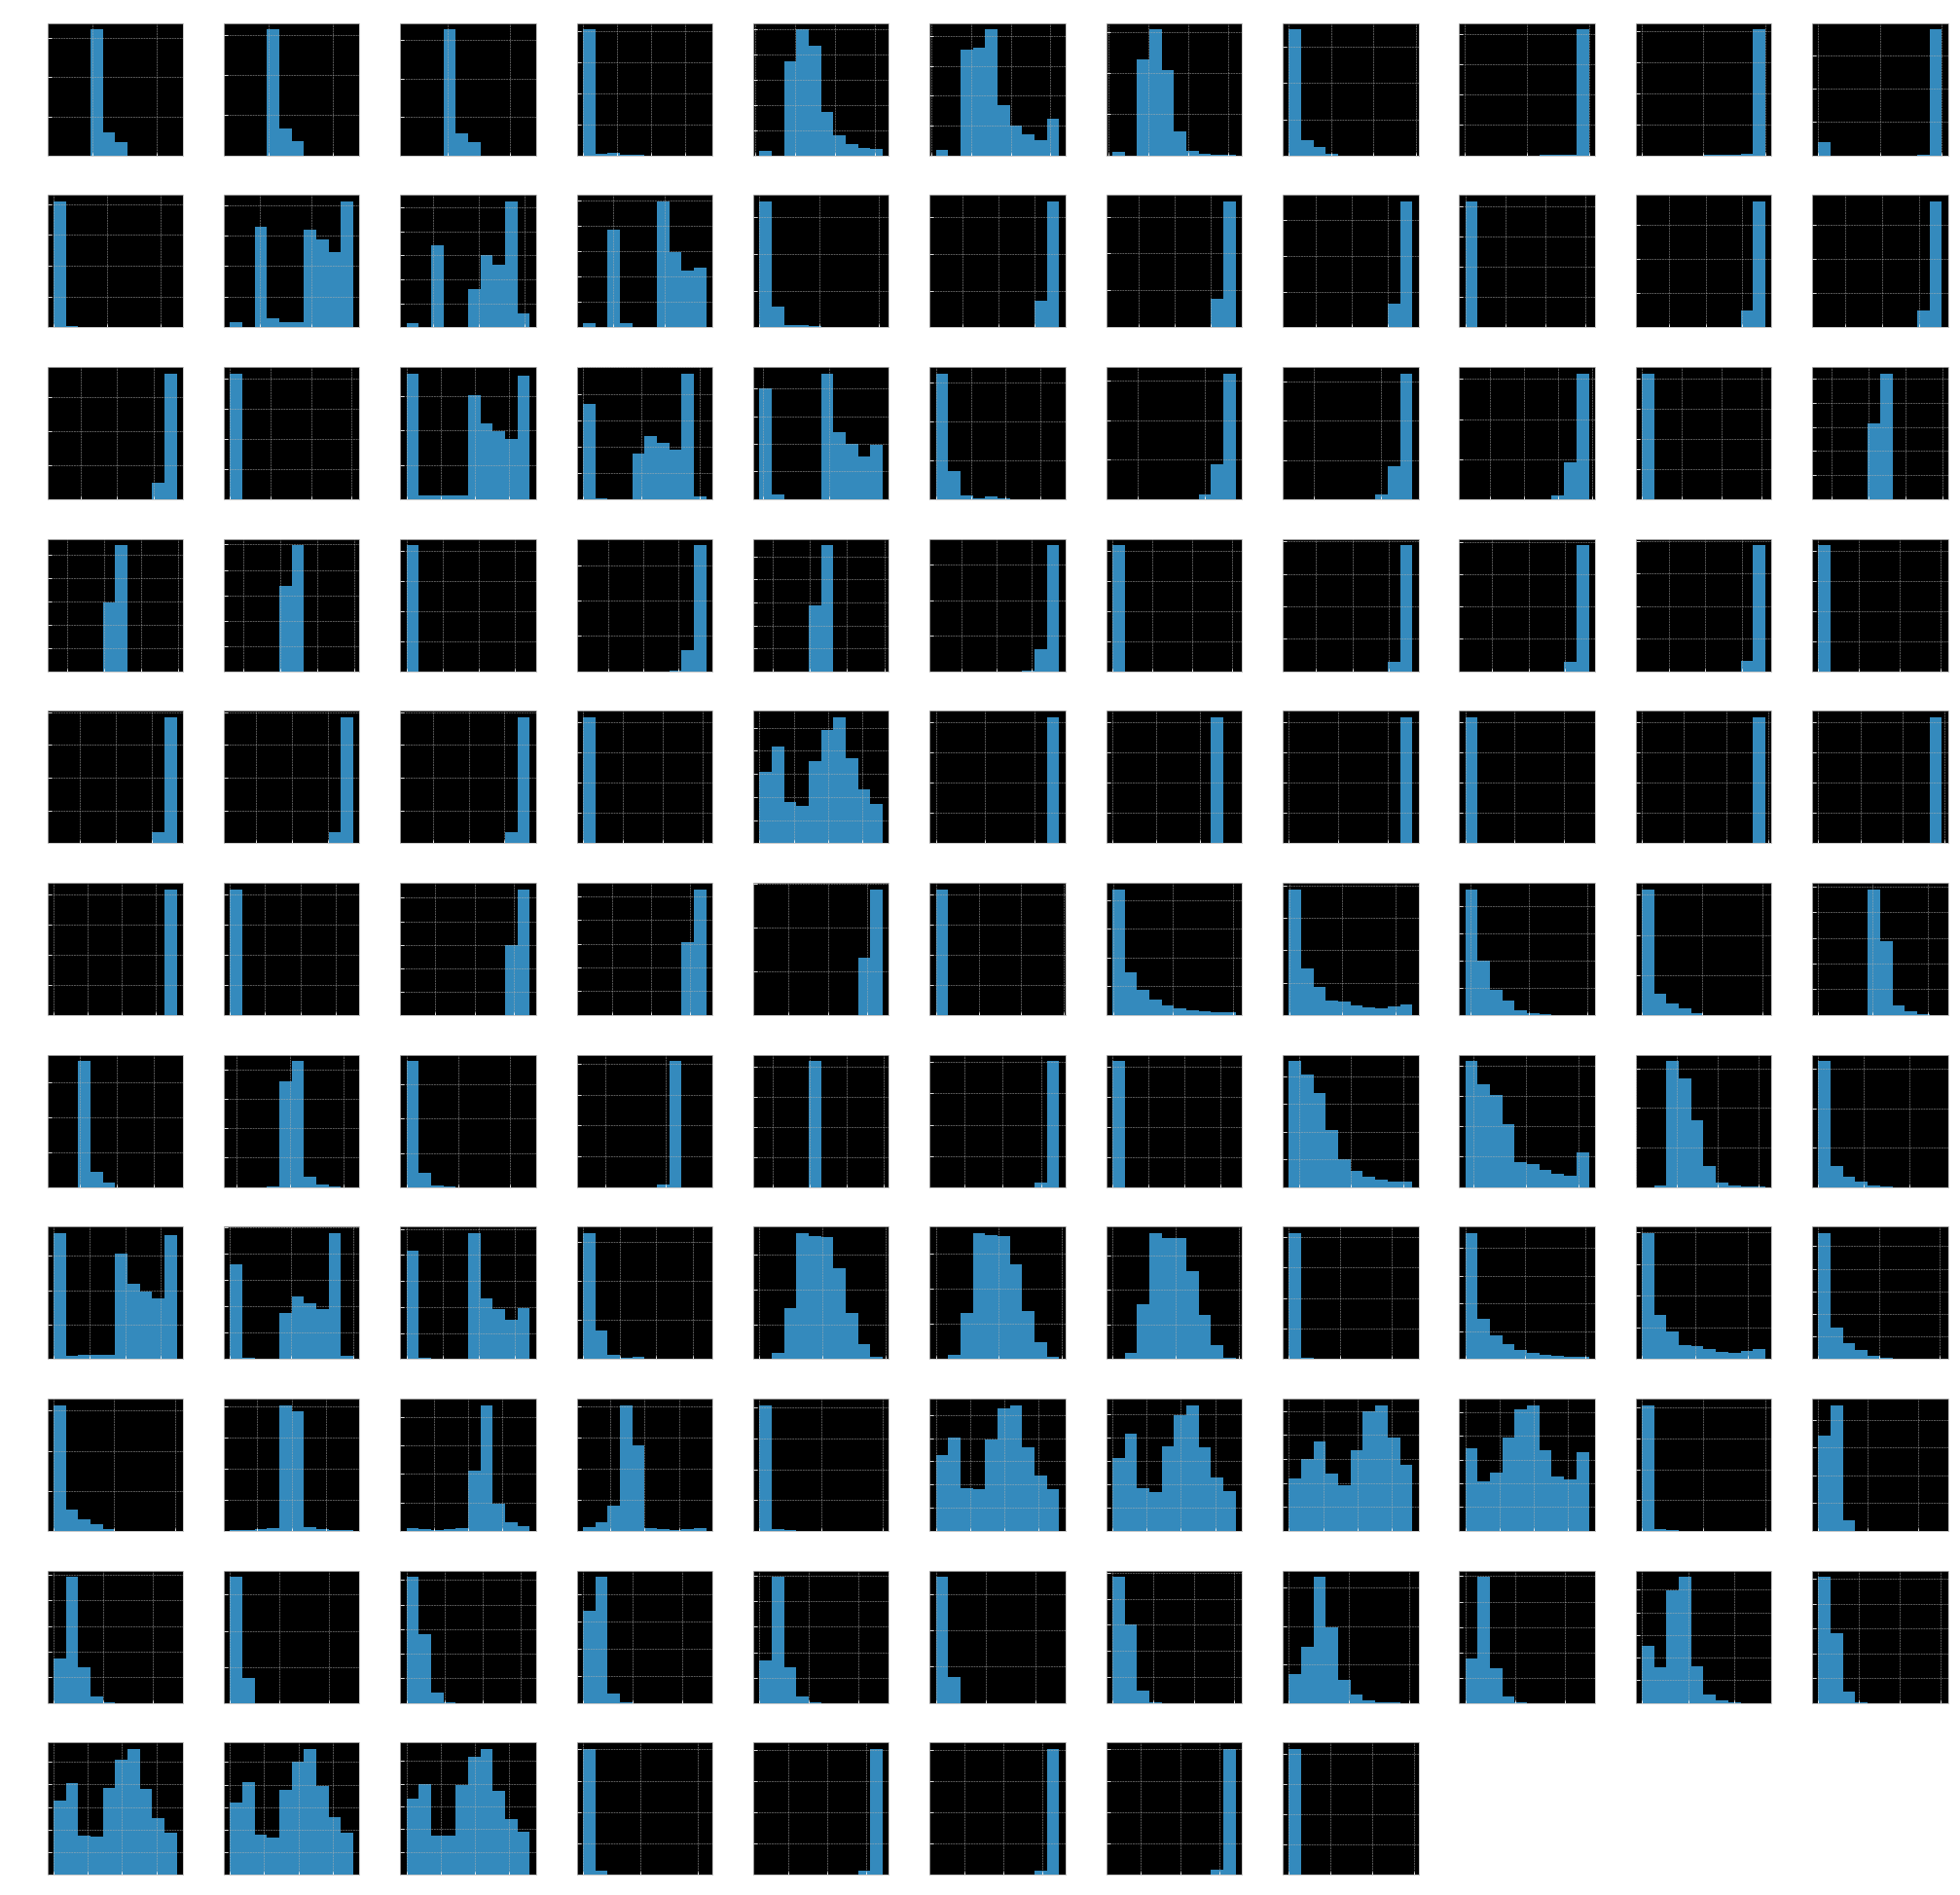

In [17]:
# Let us visualize distribution of different features.
pd.DataFrame.hist(df, figsize = [35,35]);

### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [18]:
df["Ba_avg"] = df["Ba_avg"].fillna(df["Ba_avg"].median())
df["Ba_min"] = df["Ba_min"].fillna(df["Ba_min"].median())
df["Ba_max"] = df["Ba_max"].fillna(df["Ba_max"].median())
df["Ba_std"] = df["Ba_std"].fillna(df["Ba_std"].median())

df["Rbt_avg"] = df["Rbt_avg"].fillna(df["Rbt_avg"].median())
df["Rbt_min"] = df["Rbt_min"].fillna(df["Rbt_min"].median())
df["Rbt_max"] = df["Rbt_max"].fillna(df["Rbt_max"].median())
df["Rbt_std"] = df["Rbt_std"].fillna(df["Rbt_std"].median())

df["Rm_avg"] = df["Rm_avg"].fillna(df["Rm_avg"].median())
df["Rm_min"] = df["Rm_min"].fillna(df["Rm_min"].median())
df["Rm_max"] = df["Rm_max"].fillna(df["Rm_max"].median())
df["Rm_std"] = df["Rm_std"].fillna(df["Rm_std"].median())

df["Rt_avg"] = df["Rt_avg"].fillna(df["Rt_avg"].median())
df["Rt_min"] = df["Rt_min"].fillna(df["Rt_min"].median())
df["Rt_max"] = df["Rt_max"].fillna(df["Rt_max"].median())
df["Rt_std"] = df["Rt_std"].fillna(df["Rt_std"].median())

df["DCs_avg"] = df["DCs_avg"].fillna(df["DCs_avg"].median())
df["DCs_min"] = df["DCs_min"].fillna(df["DCs_min"].median())
df["DCs_max"] = df["DCs_max"].fillna(df["DCs_max"].median())
df["DCs_std"] = df["DCs_std"].fillna(df["DCs_std"].median())

df["Q_avg"] = df["Q_avg"].fillna(df["Q_avg"].median())
df["Q_min"] = df["Q_min"].fillna(df["Q_min"].median())
df["Q_max"] = df["Q_max"].fillna(df["Q_max"].median())
df["Q_std"] = df["Q_std"].fillna(df["Q_std"].median())

df["S_avg"] = df["S_avg"].fillna(df["S_avg"].median())
df["S_min"] = df["S_min"].fillna(df["S_min"].median())
df["S_max"] = df["S_max"].fillna(df["S_max"].median())
df["S_std"] = df["S_std"].fillna(df["S_std"].median())

df["Cosphi_avg"] = df["Cosphi_avg"].fillna(df["Cosphi_avg"].median())
df["Cosphi_min"] = df["Cosphi_min"].fillna(df["Cosphi_min"].median())
df["Cosphi_max"] = df["Cosphi_max"].fillna(df["Cosphi_max"].median())
df["Cosphi_std"] = df["Cosphi_std"].fillna(df["Cosphi_std"].median())

df["P_avg"] = df["P_avg"].fillna(df["P_avg"].median())
df["P_min"] = df["P_min"].fillna(df["P_min"].median())
df["P_max"] = df["P_max"].fillna(df["P_max"].median())
df["P_std"] = df["P_std"].fillna(df["P_std"].median())

df["Ds_avg"] = df["Ds_avg"].fillna(df["Ds_avg"].median())
df["Ds_min"] = df["Ds_min"].fillna(df["Ds_min"].median())
df["Ds_max"] = df["Ds_max"].fillna(df["Ds_max"].median())
df["Ds_std"] = df["Ds_std"].fillna(df["Ds_std"].median())

df["Db1t_avg"] = df["Db1t_avg"].fillna(df["Db1t_avg"].median())
df["Db1t_min"] = df["Db1t_min"].fillna(df["Db1t_min"].median())
df["Db1t_max"] = df["Db1t_max"].fillna(df["Db1t_max"].median())
df["Db1t_std"] = df["Db1t_std"].fillna(df["Db1t_std"].median())

df["Db2t_avg"] = df["Db2t_avg"].fillna(df["Db2t_avg"].median())
df["Db2t_min"] = df["Db2t_min"].fillna(df["Db2t_min"].median())
df["Db2t_max"] = df["Db2t_max"].fillna(df["Db2t_max"].median())
df["Db2t_std"] = df["Db2t_std"].fillna(df["Db2t_std"].median())

df["Dst_avg"] = df["Dst_avg"].fillna(df["Dst_avg"].median())
df["Dst_min"] = df["Dst_min"].fillna(df["Dst_min"].median())
df["Dst_max"] = df["Dst_max"].fillna(df["Dst_max"].median())
df["Dst_std"] = df["Dst_std"].fillna(df["Dst_std"].median())

df["Gb1t_avg"] = df["Gb1t_avg"].fillna(df["Gb1t_avg"].median())
df["Gb1t_min"] = df["Gb1t_min"].fillna(df["Gb1t_min"].median())
df["Gb1t_max"] = df["Gb1t_max"].fillna(df["Gb1t_max"].median())
df["Gb1t_std"] = df["Gb1t_std"].fillna(df["Gb1t_std"].median())

df["Gb2t_avg"] = df["Gb2t_avg"].fillna(df["Gb2t_avg"].median())
df["Gb2t_min"] = df["Gb2t_min"].fillna(df["Gb2t_min"].median())
df["Gb2t_max"] = df["Gb2t_max"].fillna(df["Gb2t_max"].median())
df["Gb2t_std"] = df["Gb2t_std"].fillna(df["Gb2t_std"].median())

df["Git_avg"] = df["Git_avg"].fillna(df["Git_avg"].median())
df["Git_min"] = df["Git_min"].fillna(df["Git_min"].median())
df["Git_max"] = df["Git_max"].fillna(df["Git_max"].median())
df["Git_std"] = df["Git_std"].fillna(df["Git_std"].median())

df["Gost_avg"] = df["Gost_avg"].fillna(df["Gost_avg"].median())
df["Gost_min"] = df["Gost_min"].fillna(df["Gost_min"].median())
df["Gost_max"] = df["Gost_max"].fillna(df["Gost_max"].median())
df["Gost_std"] = df["Gost_std"].fillna(df["Gost_std"].median())

df["Ya_avg"] = df["Ya_avg"].fillna(df["Ya_avg"].median())
df["Ya_min"] = df["Ya_min"].fillna(df["Ya_min"].median())
df["Ya_max"] = df["Ya_max"].fillna(df["Ya_max"].median())
df["Ya_std"] = df["Ya_std"].fillna(df["Ya_std"].median())

df["Yt_avg"] = df["Yt_avg"].fillna(df["Yt_avg"].median())
df["Yt_min"] = df["Yt_min"].fillna(df["Yt_min"].median())
df["Yt_max"] = df["Yt_max"].fillna(df["Yt_max"].median())
df["Yt_std"] = df["Yt_std"].fillna(df["Yt_std"].median())

df["Ws1_avg"] = df["Ws1_avg"].fillna(df["Ws1_avg"].median())
df["Ws1_min"] = df["Ws1_min"].fillna(df["Ws1_min"].median())
df["Ws1_max"] = df["Ws1_max"].fillna(df["Ws1_max"].median())
df["Ws1_std"] = df["Ws1_std"].fillna(df["Ws1_std"].median())

df["Ws2_avg"] = df["Ws2_avg"].fillna(df["Ws2_avg"].median())
df["Ws2_min"] = df["Ws2_min"].fillna(df["Ws2_min"].median())
df["Ws2_max"] = df["Ws2_max"].fillna(df["Ws2_max"].median())
df["Ws2_std"] = df["Ws2_std"].fillna(df["Ws2_std"].median())

df["Ws_avg"] = df["Ws_avg"].fillna(df["Ws_avg"].median())
df["Ws_min"] = df["Ws_min"].fillna(df["Ws_min"].median())
df["Ws_max"] = df["Ws_max"].fillna(df["Ws_max"].median())
df["Ws_std"] = df["Ws_std"].fillna(df["Ws_std"].median())

df["Wa_avg"] = df["Wa_avg"].fillna(df["Wa_avg"].median())
df["Wa_min"] = df["Wa_min"].fillna(df["Wa_min"].median())
df["Wa_max"] = df["Wa_max"].fillna(df["Wa_max"].median())
df["Wa_std"] = df["Wa_std"].fillna(df["Wa_std"].median())

df["Va_avg"] = df["Va_avg"].fillna(df["Va_avg"].median())
df["Va_min"] = df["Va_min"].fillna(df["Va_min"].median())
df["Va_max"] = df["Va_max"].fillna(df["Va_max"].median())
df["Va_std"] = df["Va_std"].fillna(df["Va_std"].median())

df["Ot_avg"] = df["Ot_avg"].fillna(df["Ot_avg"].median())
df["Ot_min"] = df["Ot_min"].fillna(df["Ot_min"].median())
df["Ot_max"] = df["Ot_max"].fillna(df["Ot_max"].median())
df["Ot_std"] = df["Ot_std"].fillna(df["Ot_std"].median())

df["Nf_avg"] = df["Nf_avg"].fillna(df["Nf_avg"].median())
df["Nf_min"] = df["Nf_min"].fillna(df["Nf_min"].median())
df["Nf_max"] = df["Nf_max"].fillna(df["Nf_max"].median())
df["Nf_std"] = df["Nf_std"].fillna(df["Nf_std"].median())

df["Nu_avg"] = df["Nu_avg"].fillna(df["Nu_avg"].median())
df["Nu_min"] = df["Nu_min"].fillna(df["Nu_min"].median())
df["Nu_max"] = df["Nu_max"].fillna(df["Nu_max"].median())
df["Nu_std"] = df["Nu_std"].fillna(df["Nu_std"].median())

df["Rs_avg"] = df["Rs_avg"].fillna(df["Rs_avg"].median())
df["Rs_min"] = df["Rs_min"].fillna(df["Rs_min"].median())
df["Rs_max"] = df["Rs_max"].fillna(df["Rs_max"].median())
df["Rs_std"] = df["Rs_std"].fillna(df["Rs_std"].median())

df["Cm_avg"] = df["Cm_avg"].fillna(df["Cm_avg"].median())
df["Cm_min"] = df["Cm_min"].fillna(df["Cm_min"].median())
df["Cm_max"] = df["Cm_max"].fillna(df["Cm_max"].median())
df["Cm_std"] = df["Cm_std"].fillna(df["Cm_std"].median())

df["Na_c_avg"] = df["Na_c_avg"].fillna(df["Na_c_avg"].median())
df["Wa_c_avg"] = df["Wa_c_avg"].fillna(df["Wa_c_avg"].median())

Now let's try to figure out the normality of our Active Power average.

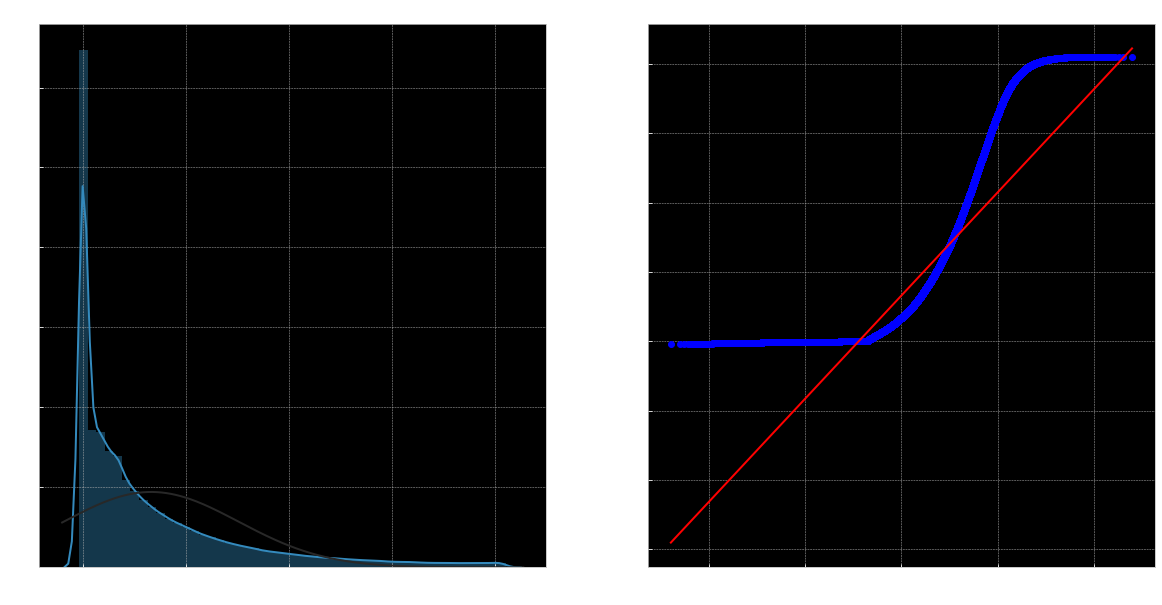

Skewness: 1.797569
Kurtosis: 3.030170


In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Active Power Distribution")
sns.distplot(df.P_avg, fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(df.P_avg, plot=plt)
plt.show()
print("Skewness: %f" % df.P_avg.skew())
print("Kurtosis: %f" % df.P_avg.kurt())

Now this is interesting, we have our dependent variable right/poitive skewed and has a peak value too between range -18.49 and 2051.87. and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. I learnt it in my data models and decision making curriculum that in case of positive skewness, log transformations usually works well.

What other transformations we can use ?

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: cannot convert float NaN to integer

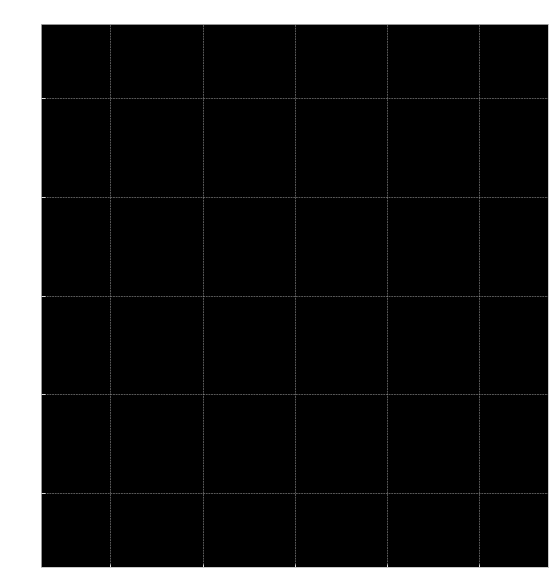

In [20]:
from scipy import stats
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Active Power Distribution")
sns.distplot(np.log(df.P_avg[df.P_avg != 'NaN']), fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(np.log(df.P_avg).astype(int), plot=plt)
plt.show()
print("Skewness: %f" % np.log(df.P_avg).astype(int).skew())
print("Kurtosis: %f" % np.log(df.P_avg).astype(int).kurt())

In [21]:
# Let us identify any missing values, and fill in missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

Total  Percent
Na_c_avg               0      0.0
Wa_c_avg               0      0.0
Cosphi_min             0      0.0
Cosphi_max             0      0.0
Cosphi_std             0      0.0
...                  ...      ...
Ws_max                 0      0.0
Ws_std                 0      0.0
Wa_avg                 0      0.0
Wa_min                 0      0.0
Wind_turbine_name      0      0.0

[120 rows x 2 columns]

## Exploratory Data Analysis

Here we are going use matrix correlation on the average of features to explore how each variable or feature is link to the average of active power and then proceed to the feature selection. 

In [22]:
df_avg =df[["Ba_avg", "Rbt_avg", "Rm_avg", "Na_c_avg", "Wa_c_avg", "Rs_avg", "Nu_avg", "Nf_avg", "Ot_avg", "Va_avg", "Wa_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Yt_avg", "Ya_avg", "Gost_avg", "Git_avg", "Gb2t_avg", "Gb1t_avg", "Dst_avg", "Db2t_avg", "Db1t_avg", "Ds_avg", "P_avg", "Cosphi_avg", "S_avg", "Q_avg", "DCs_avg", "Rt_avg"]]

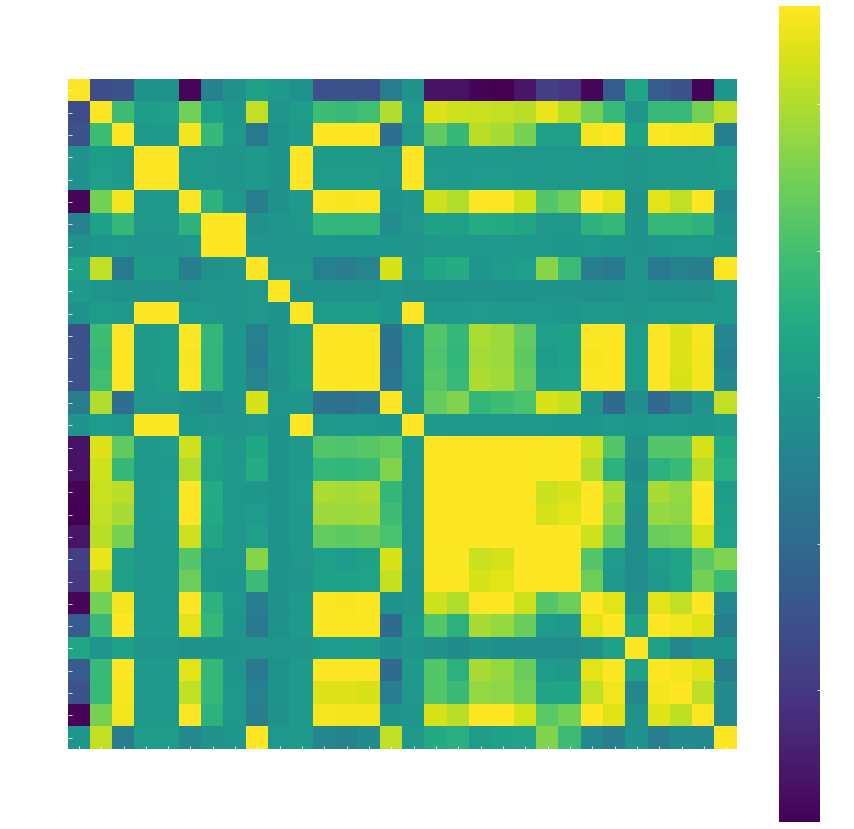

In [23]:
corrmat= df_avg.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='viridis',linecolor="white");

In [24]:
set_default()

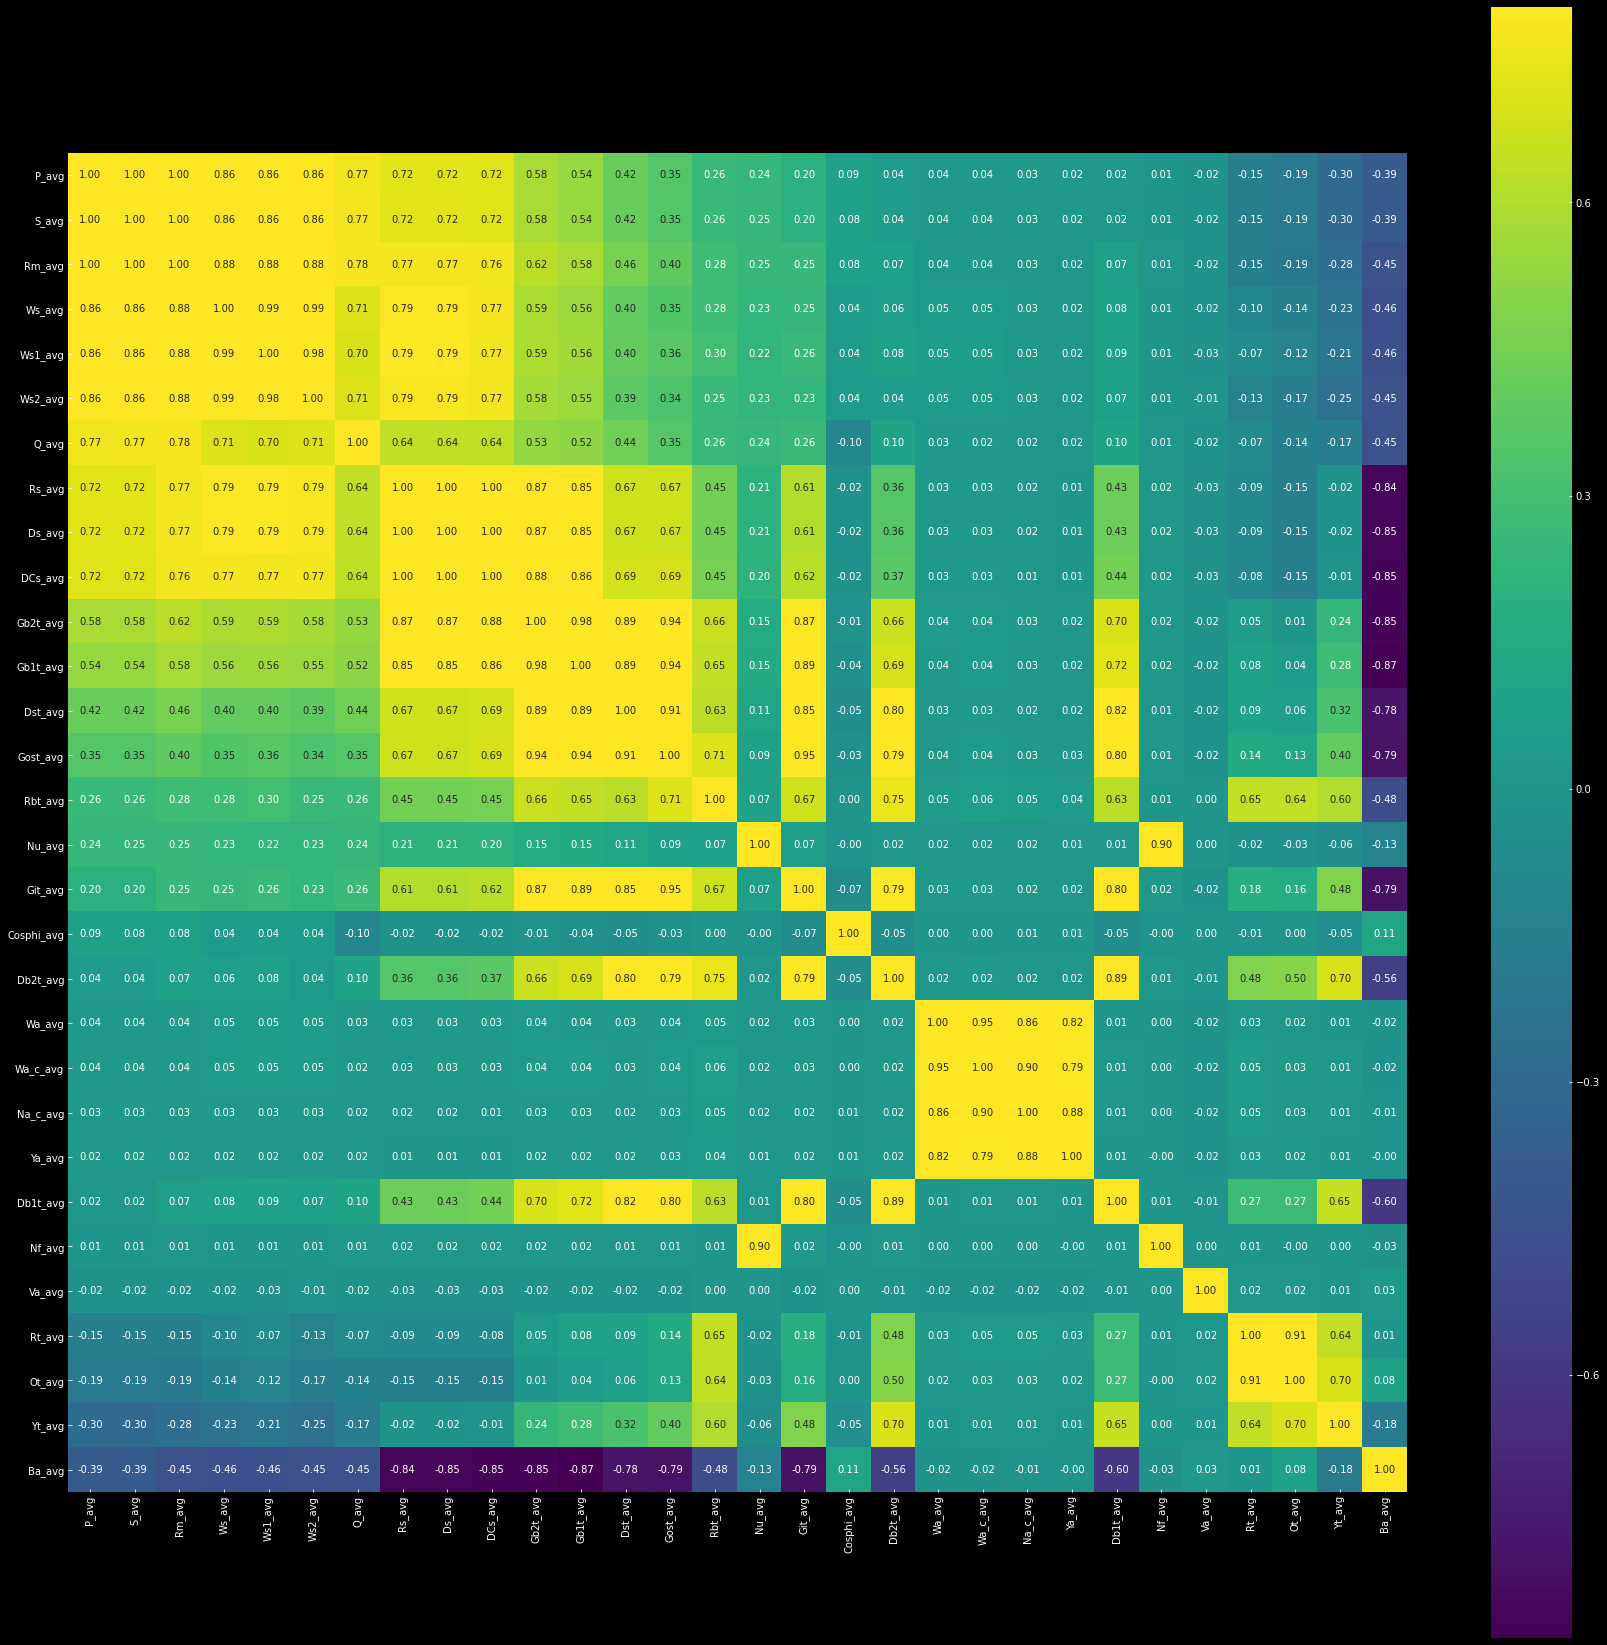

In [25]:
k = 30 #number of variables for heatmap
plt.subplots(figsize=(30, 30))
cols = (corrmat.nlargest(k, 'P_avg')['P_avg']).index
cm = np.corrcoef(df_avg[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            yticklabels=cols.values, xticklabels=cols.values,cmap='viridis',linecolor="white")

Using this correlation matrix, I am able to visualise the raw highly influencing factors on "P_avg"(Active Power). I am looking for these because I will point out features the highly correlating features, in an attempt to capture the complex non-linear relationships within the data.

This is too huge. We need to narrow it down. Let's make a zoomed style heatmap for our 'P_avg' by picking up the 11 variable with which our 'P_avg' has the strongest correlation.

#### Let us visualize the matrix correlation of the features higthly correlated with "P_avg" (Active Power)

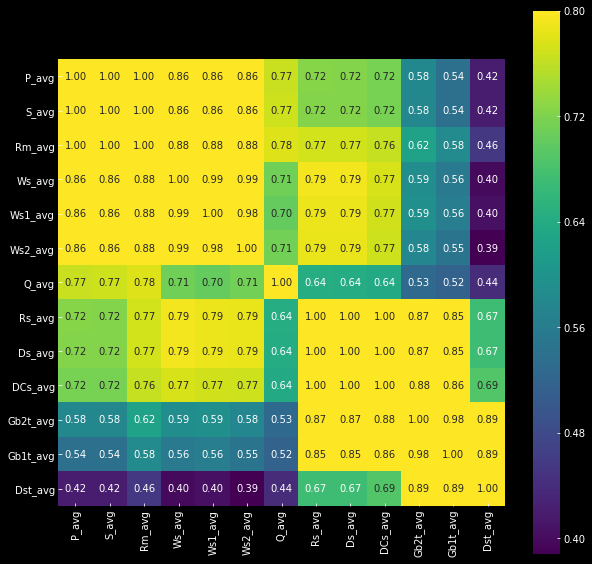

In [26]:
k = 13 #number of variables for heatmap
plt.subplots(figsize=(10, 10))
cols = (corrmat.nlargest(k, 'P_avg')['P_avg']).index
cm = np.corrcoef(df_avg[cols].values.T)
# sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            yticklabels=cols.values, xticklabels=cols.values,cmap='viridis',linecolor="white")

In [27]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                     P_avg
1                     S_avg
2                    Rm_avg
3                    Ws_avg
4                   Ws1_avg
5                   Ws2_avg
6                     Q_avg
7                    Rs_avg
8                    Ds_avg
9                   DCs_avg
10                 Gb2t_avg
11                 Gb1t_avg
12                  Dst_avg

Feature selection   
    - P describe data as "Active power"
    - S describe data as "Apparent power"
    - Rm describe data as "Torque"	
    - Ws describe data as "Wind speed"	
    - Ws1 describe data as "Wind speed 1"	
    - Ws2 describe data as "Wind speed 2"
    - Q describe data as "Reactive power"
    - Rs describe data as "Rotor speed"
    - Ds describe data as "Generator speed"
    - DCs describe data as "Generator converter speed"
    - Gb1t describe data as "Gearbox bearing 1 temperature"
    - Gb2t describe data as "Gearbox bearing 2 temperature"	

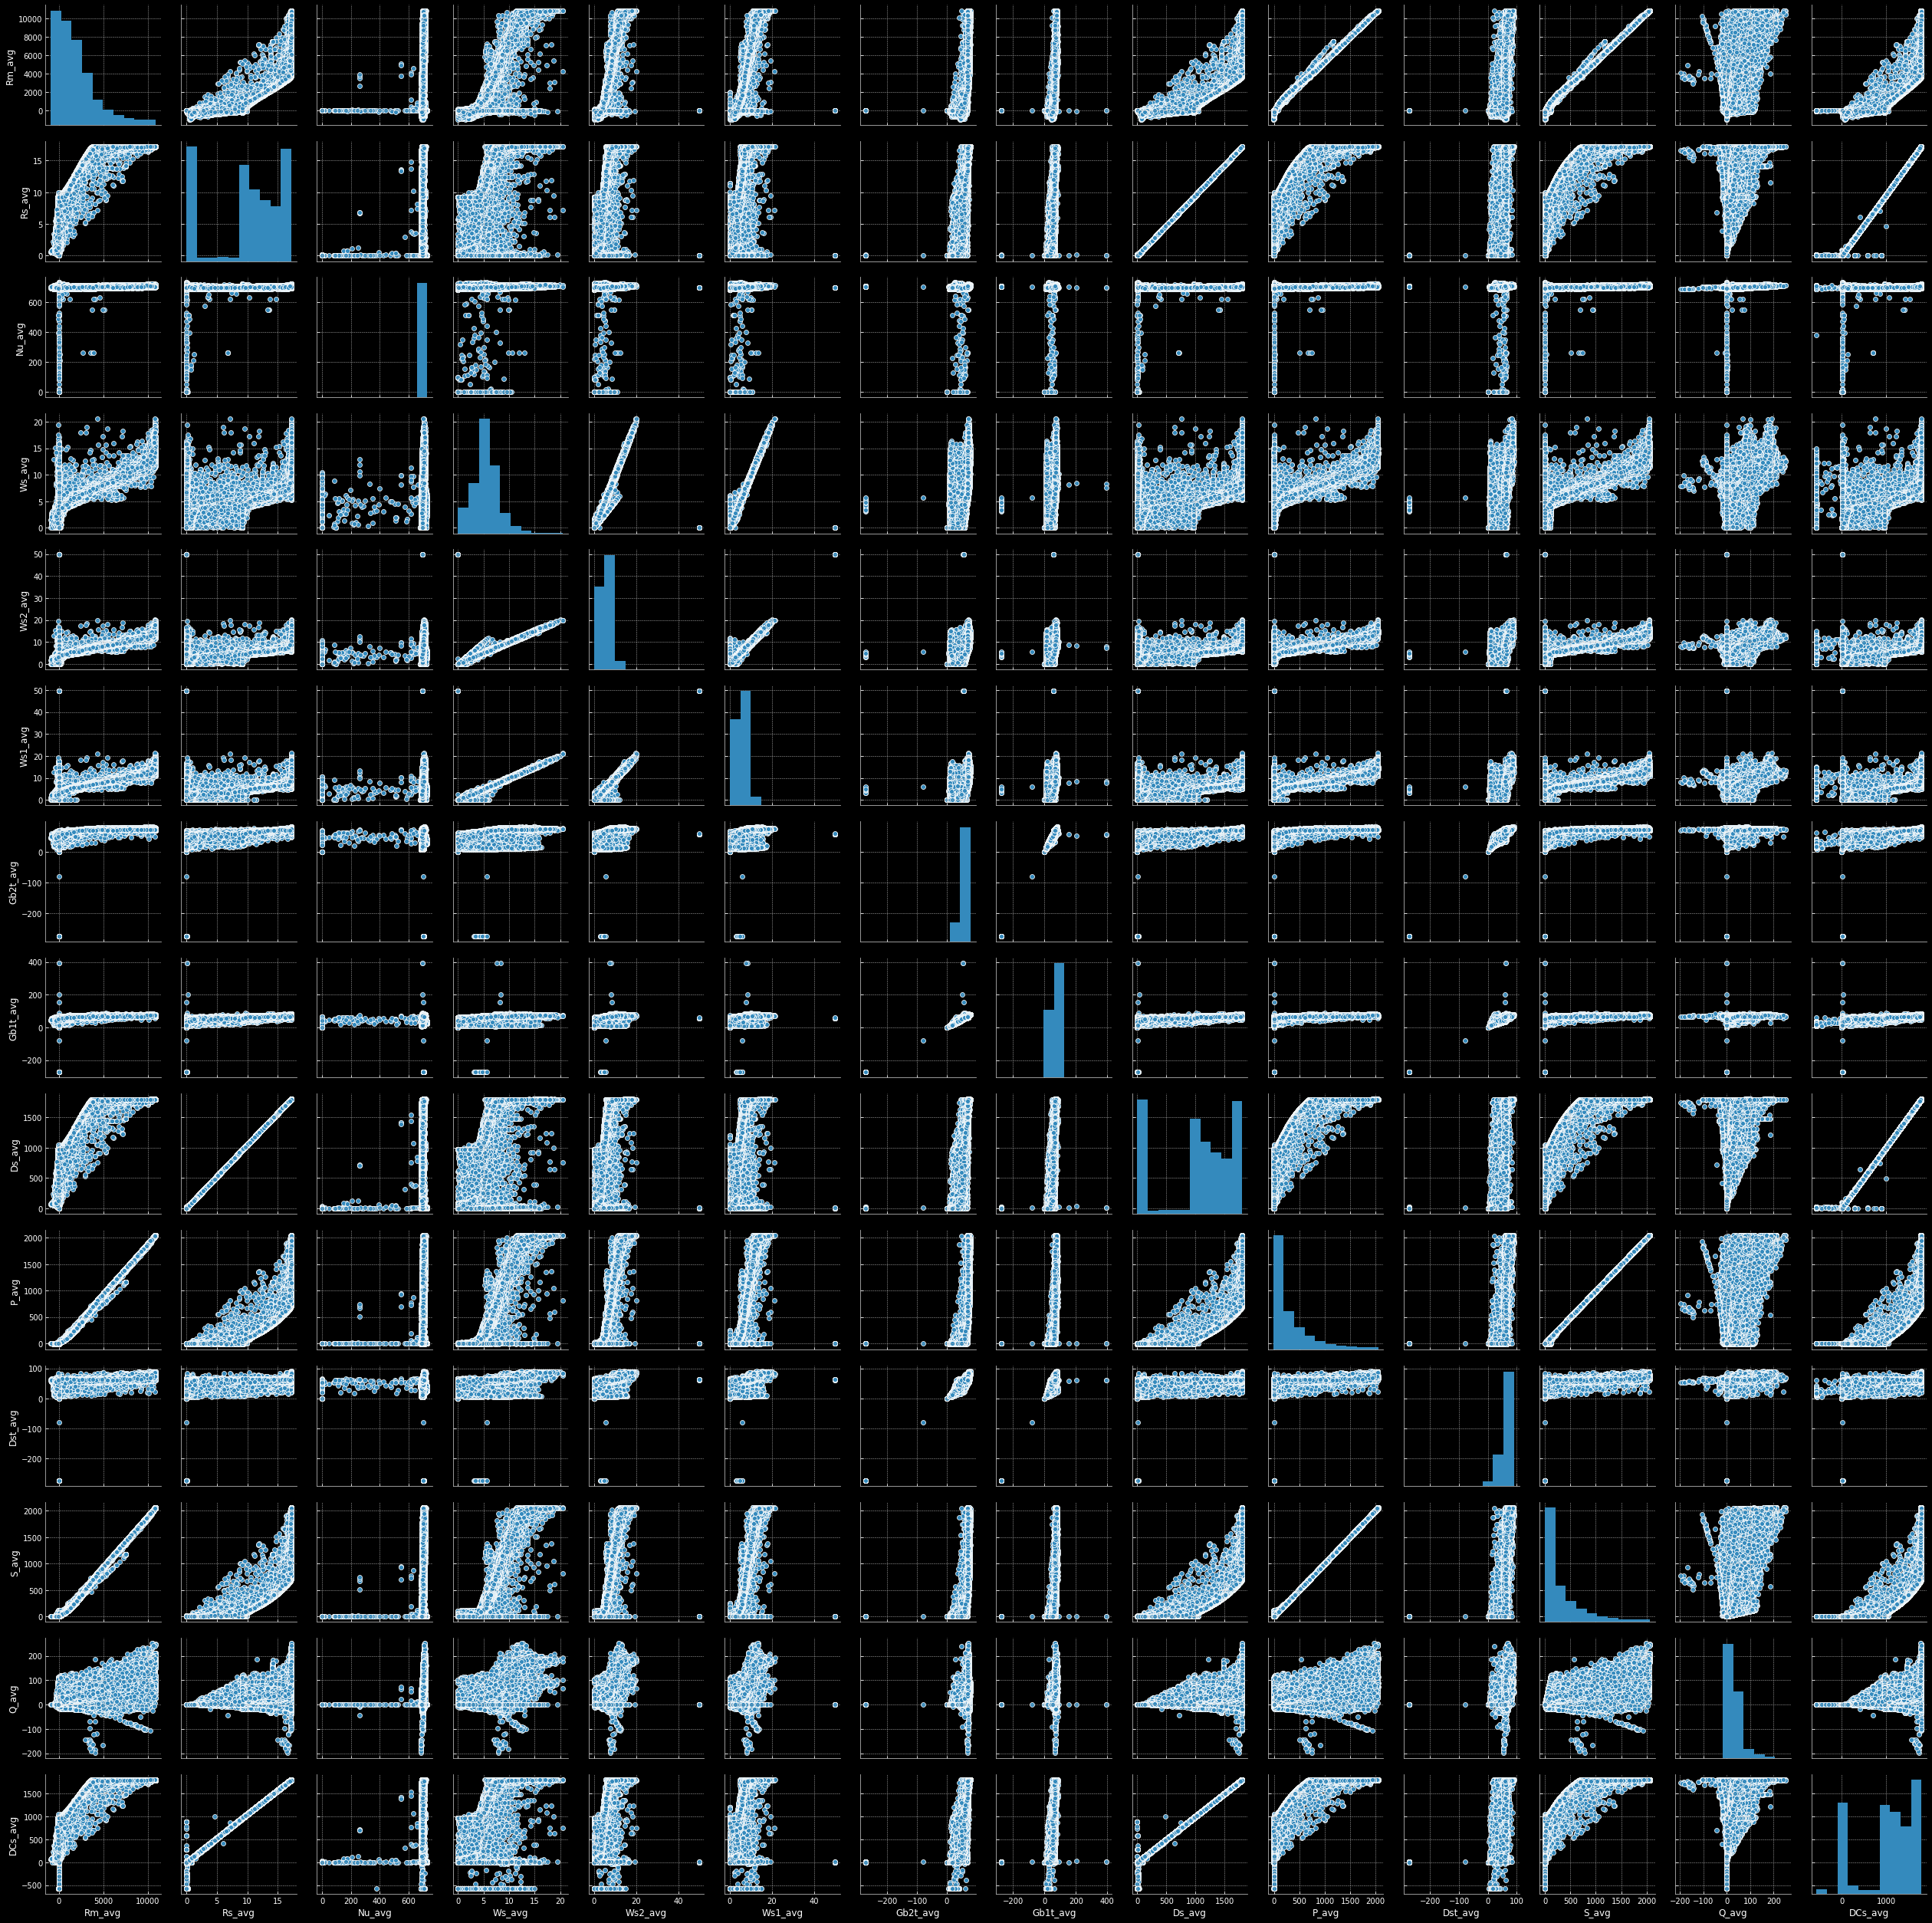

In [28]:
# Let's proceed to the scatter plots. 
cols = ["Rm_avg",  "Rs_avg", "Nu_avg", "Ws_avg", "Ws2_avg", "Ws1_avg", "Gb2t_avg", "Gb1t_avg", "Ds_avg", "P_avg", "Dst_avg", "S_avg", "Q_avg", "DCs_avg"]
sns.pairplot(df[cols])

Having a close done of the feature selection, we can now each feature to see what to adopt as far as the maximum, the minimum and the average of each feature concern. 

#### Evaluates active power: P.

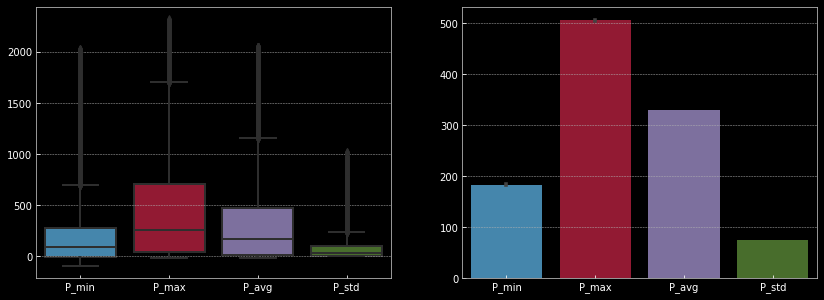

In [42]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['P_min','P_max','P_avg', 'P_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in active power feature distribution. Furthermore there is great difference between the distribution of the minimum active power and the maximum active power. This makes reasonable to choice of the use  of active power average.  

#### Evaluates Reactive power: Q.

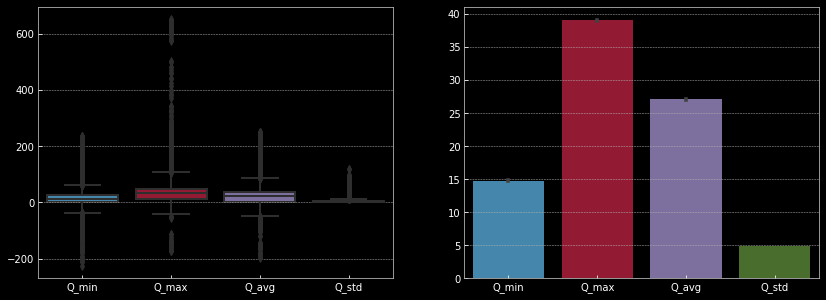

In [43]:
# Let us visualize Reactive power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Q_min','Q_max','Q_avg', 'Q_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in reactive power feature distribution. Furthermore there is a large gap between the distribution of minimum reactive power and maximum reactive power. This makes reasonable to choice of the use of reactive power average. Standard deviation shows an acceptable variation.

#### Evaluates the Apparent power: S

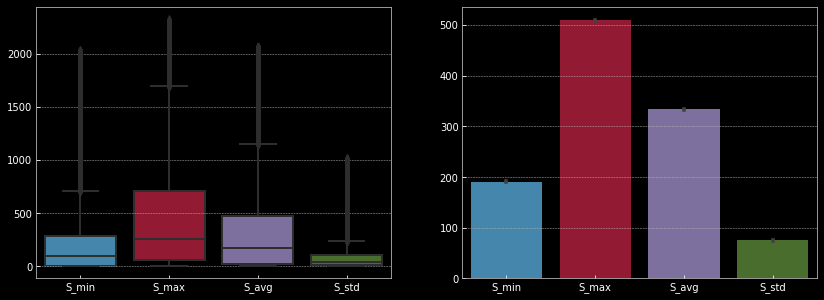

In [44]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['S_min','S_max','S_avg', 'S_std']], orient = 'v', ax= ax2);

#### Evaluates the Torque: Rm

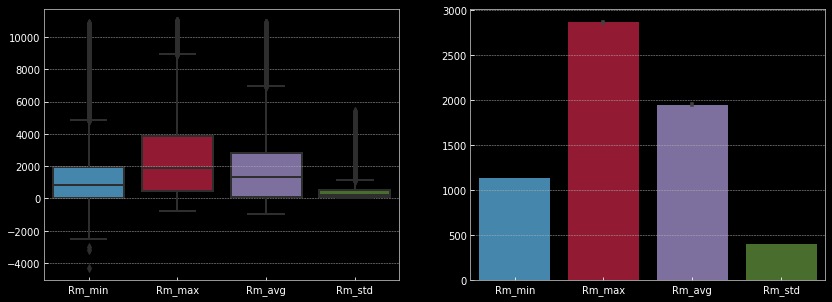

In [45]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rm_min','Rm_max','Rm_avg', 'Rm_std']], orient = 'v', ax= ax2);

#### Evaluates Wind Speed: Ws

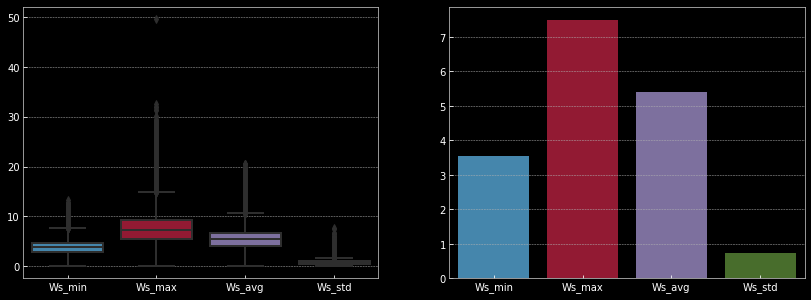

In [46]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws_min','Ws_max','Ws_avg', 'Ws_std']], orient = 'v', ax= ax2);

#### Evaluates Wind Speed 1: Ws1

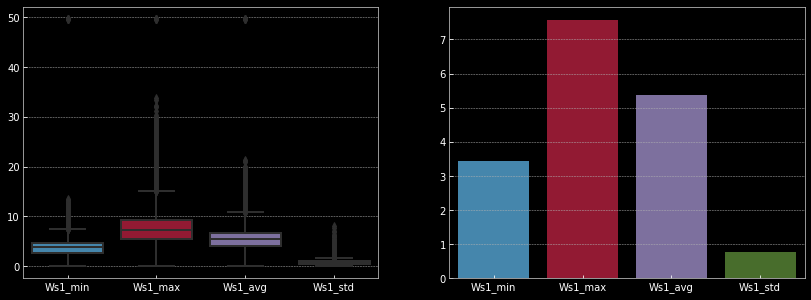

In [47]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws1_min','Ws1_max','Ws1_avg', 'Ws1_std']], orient = 'v', ax= ax2);

#### Evaluates Wind Speed 2: Ws2

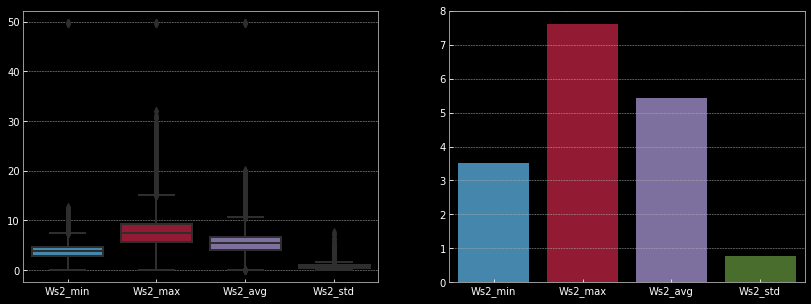

In [48]:
# Let us visualize power boxplot
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ws2_min','Ws2_max','Ws2_avg', 'Ws2_std']], orient = 'v', ax= ax2);

#### Evaluates Rotor speed: Rs 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Rs_min','Rs_max','Rs_avg', 'Rs_std']], orient = 'v', ax= ax2);

#### Evaluates Generator speed: Ds

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Ds_min','Ds_max','Ds_avg', 'Ds_std']], orient = 'v', ax= ax2);

#### Evaluates "Generator converter speed": DCs

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['DCs_min','DCs_max','DCs_avg', 'DCs_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['DCs_min','DCs_max','DCs_avg', 'DCs_std']], orient = 'v', ax= ax2);

#### Evaluates "Gearbox bearing 1 temperature": Gb1t

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Gb1t_min','Gb1t_max','Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Gb1t_min','Gb1t_max','Gb1t_avg', 'Gb1t_std']], orient = 'v', ax= ax2);

#### Evaluates "Gearbox bearing 2 temperature": Gb2t

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(14,5))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Gb2t_min','Gb2t_max','Gb2t_avg', 'Gb2t_std']], orient = 'v', ax= ax2);

We can notice the presence of outliers in reactive power feature distribution. Furthermore there is a large gap between the distribution of minimum reactive power and maximum reactive power. This makes reasonable to choice of the use of reactive power average. And the standard deviation is varied around 10 percent of the maximum size in various cases.

In [29]:
df_wind = df[['Wind_turbine_name', 'Date_time', 'P_avg', 'Q_avg', 'S_avg', 'Gb2t_avg', 'Gb1t_avg', 'DCs_avg', 'Ds_avg', 'Rs_avg', 'Ws_avg', 'Ws1_avg', 'Ws2_avg','Rm_avg']]

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


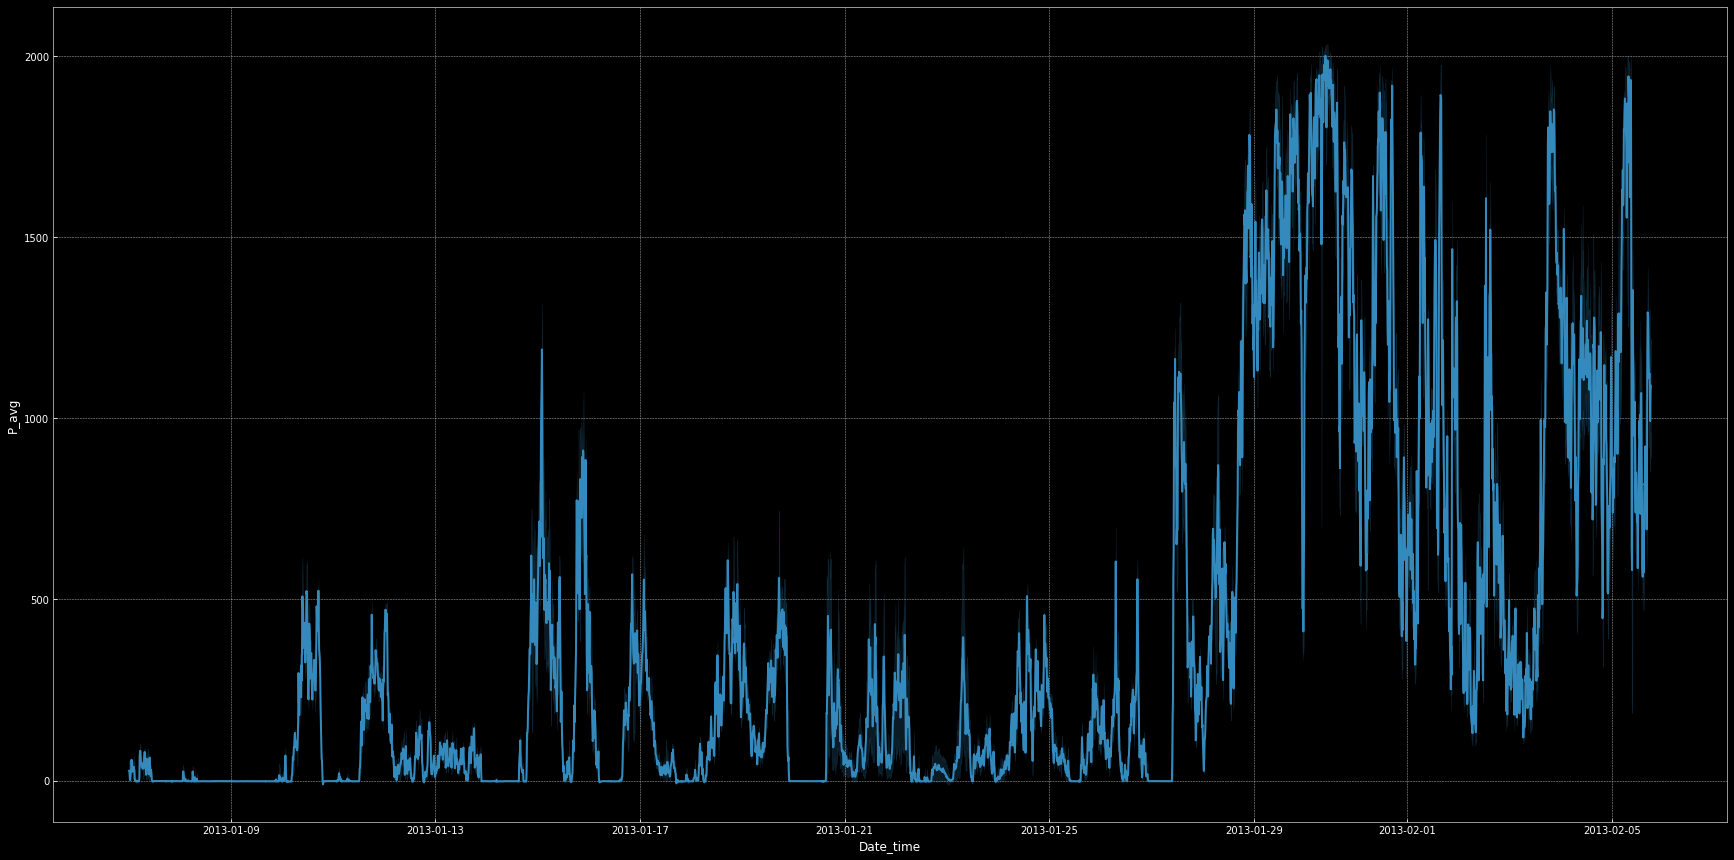

In [30]:
fig, ax = plt.subplots(figsize =(30,15)) 
df_wind.sort_values('Date_time', ascending=True, inplace = True)
sns.lineplot(x ='Date_time', y='P_avg', data=df_wind.loc[0:100,:])

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [31]:
df1= df_wind.groupby("Wind_turbine_name").sum()

In [32]:
df1

P_avg         Q_avg         S_avg      Gb2t_avg  \
Wind_turbine_name                                                           
R80711             8.057993e+07  3.187610e+06  8.106177e+07  1.302709e+07   
R80721             6.462957e+07  7.076946e+06  6.551469e+07  1.276964e+07   
R80736             6.995673e+07  6.628441e+06  7.064915e+07  1.277867e+07   
R80790             6.231200e+07  5.849314e+06  6.324971e+07  1.133965e+07   

                       Gb1t_avg       DCs_avg        Ds_avg        Rs_avg  \
Wind_turbine_name                                                           
R80711             1.282002e+07  2.427385e+08  2.424639e+08  2.310952e+06   
R80721             1.290124e+07  2.248397e+08  2.253195e+08  2.146963e+06   
R80736             1.244793e+07  2.291543e+08  2.285213e+08  2.177589e+06   
R80790             1.083907e+07  1.899934e+08  1.958958e+08  1.865904e+06   

                         Ws_avg       Ws1_avg       Ws2_avg        Rm_avg  
Wind_turbine_name                                                          
R80711             1.196633e+06  1.200174e+06  1.193993e+06  4.720414e+08  
R80721             1.095424e+06  1.079314e+06  1.111535e+06  3.867577e+08  
R80736             1.108659e+06  1.101804e+06  1.115501e+06  4.163277e+08  
R80790             1.137616e+06  1.135861e+06  1.139304e+06  3.664167e+08

In [33]:
# Let us count the number of turbine in the dataset:
print("The number of of different turbines in the dataset is: " + str(df1.shape[0]))
# The number of turbine in each quality in the dataset is:
number_turbine = df_wind.groupby("Wind_turbine_name")["Wind_turbine_name"].count()
print("The number of turbines in different quality in the dataset is: " + str(number_turbine))

The number of of different turbines in the dataset is: 4
The number of turbines in different quality in the dataset is: Wind_turbine_name
R80711    210095
R80721    210095
R80736    210095
R80790    210095
Name: Wind_turbine_name, dtype: int64


The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [34]:
# Taking out the columns needed for data processing 
df_months = df_wind.loc[:,["Wind_turbine_name", "Date_time", "P_avg", 'P_min','P_max', 'P_std', "Q_avg", 'Q_min','Q_max', 'Q_std', "S_avg", 'S_min','S_max', 'S_std']]

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [35]:
# grouping into months
import datetime
df_months['Date_time']=df_months["Date_time"].apply(lambda df_months:datetime.datetime(year=df_months.year, month=df_months.month, day=df_months.day))
df_months.set_index(df_months["Date_time"], inplace=True) #Using the date column as index

In [36]:
# Group into months and summing up the consumption values
data_ts = df_months.resample("M").sum()

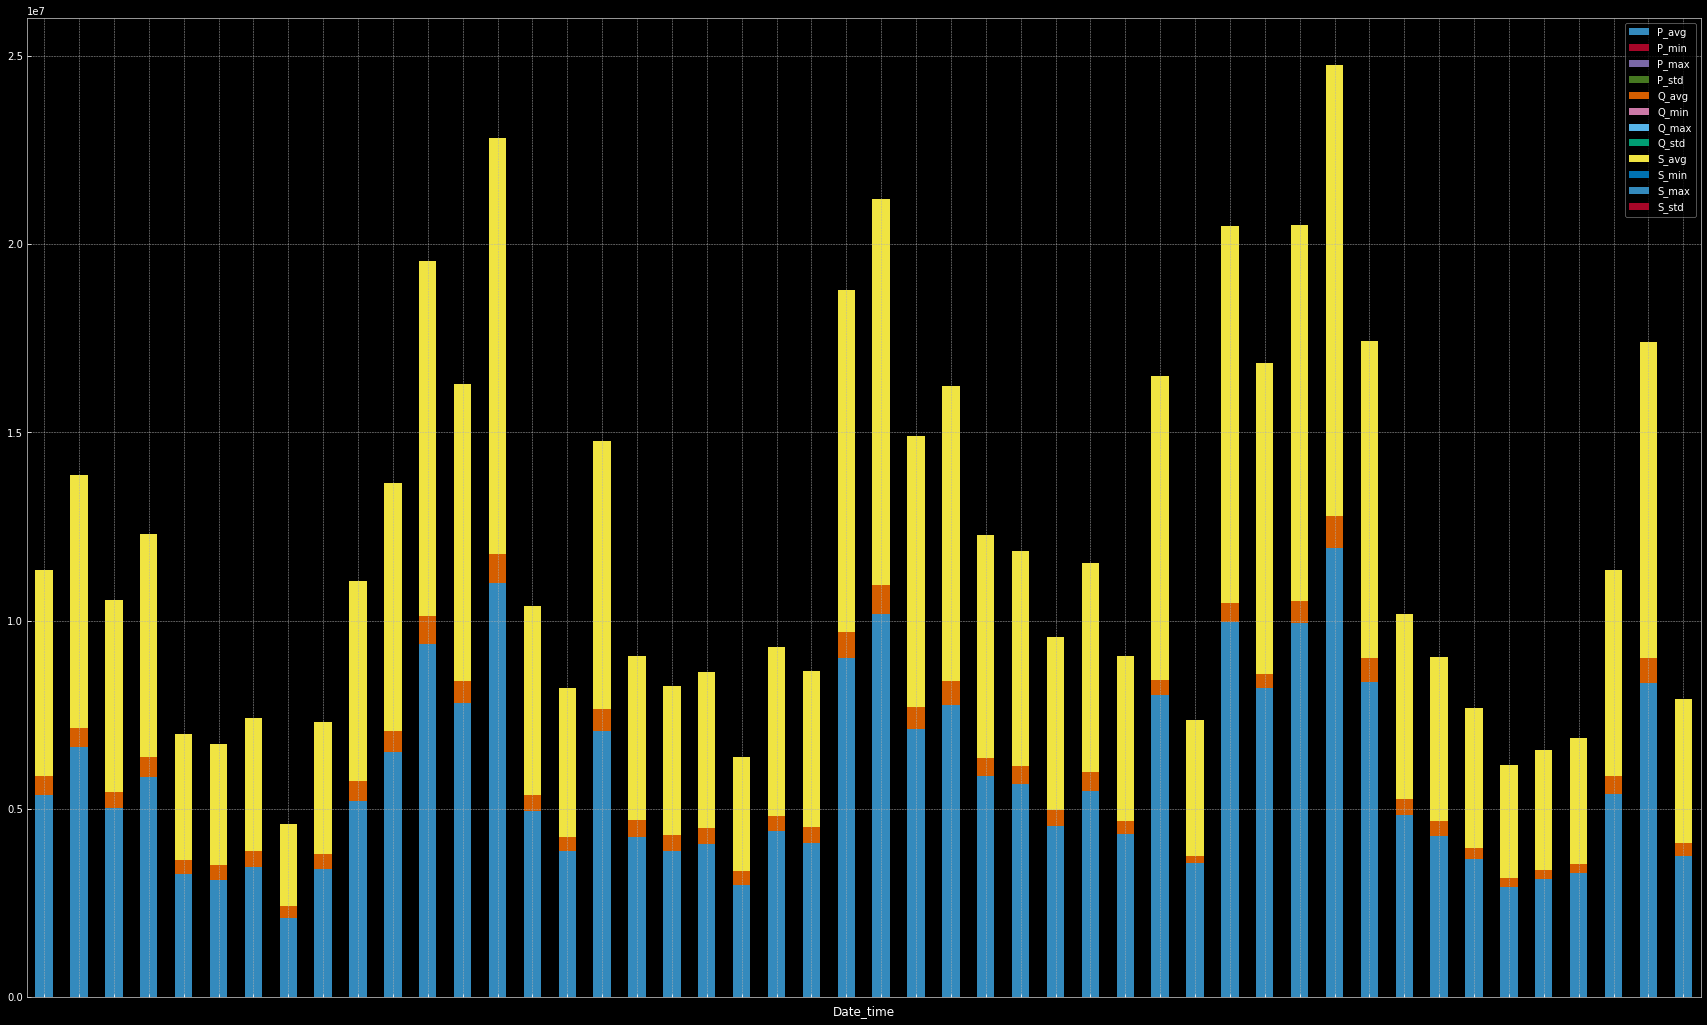

In [37]:
import matplotlib.ticker as ticker
ax = data_ts.plot(kind="bar", stacked=True, figsize=(30,20))# kind="bar", x=data_ts.index, stacked=True)

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(data_ts.index)

# Every 4th tick lable shows the month and day
#ticklabels[::4] = [item.strftime('%b %d') for item in data_ts.index[::4]]

# Every 12th ticklable includes the year
ticklables = [item for item in data_ts.index]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()

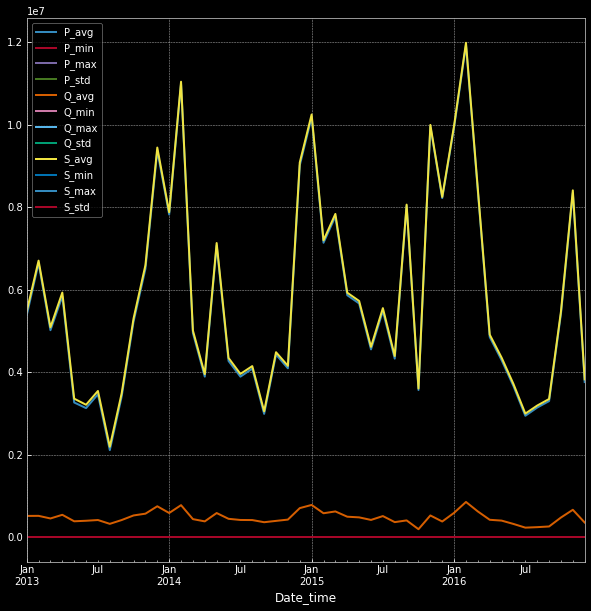

In [38]:
# Let us visualise the trends in power output(Active power: P_avg), Q_avg(Reactive power), and S_avg(Apparent power) 
data_ts.plot()
plt.show()

There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [39]:
df2= df_wind.groupby("Wind_turbine_name").get_group('R80711')
df2

Wind_turbine_name                  Date_time        P_avg      Q_avg  \
524480            R80711  2013-01-01 00:00:00+01:00  1072.650000  14.490000   
216394            R80711  2013-01-01 00:10:00+01:00  1061.430100  23.700001   
81015             R80711  2013-01-01 00:20:00+01:00  1144.790000  25.480000   
216385            R80711  2013-01-01 00:30:00+01:00  1183.980000  24.379999   
225065            R80711  2013-01-01 00:40:00+01:00  1317.550000  14.470000   
...                  ...                        ...          ...        ...   
248127            R80711  2016-12-31 23:10:00+01:00    -0.560000   0.000000   
389833            R80711  2016-12-31 23:20:00+01:00    -0.730000   0.000000   
501532            R80711  2016-12-31 23:30:00+01:00    20.950001   4.690000   
385759            R80711  2016-12-31 23:40:00+01:00    54.900002  11.060000   
339314            R80711  2016-12-31 23:50:00+01:00    94.010002  12.960000   

              S_avg   Gb2t_avg   Gb1t_avg     DCs_avg      Ds_avg     Rs_avg  \
524480  1072.790000  70.040001  64.529999  1800.99000  1799.91000  17.180000   
216394  1061.750000  71.040001  68.589996  1799.97000  1798.88000  17.170000   
81015   1145.140000  72.400002  71.000000  1801.18990  1800.09000  17.180000   
216385  1184.319900  73.419998  72.410004  1801.14000  1800.06010  17.180000   
225065  1317.689900  72.449997  69.260002  1801.01000  1799.93010  17.180000   
...             ...        ...        ...         ...         ...        ...   
248127     0.560000  26.639999  29.500000   148.74001   146.31000   1.390000   
389833     0.730000  26.430000  28.650000   165.22000   162.75000   1.540000   
501532    23.170000  27.120001  30.530001   597.09998   594.90997   5.650000   
385759    56.090000  32.139999  41.910000   971.78003   970.09003   9.229999   
339314    94.940002  36.070000  47.860001  1024.52000  1022.92000   9.729999   

          Ws_avg   Ws1_avg   Ws2_avg       Rm_avg  
524480  8.960000  8.770001  9.160000  5690.279800  
216394  8.890000  8.660000  9.120000  5632.720200  
81015   9.190000  8.940000  9.450000  6071.689900  
216385  8.920000  8.870000  8.979999  6279.470200  
225065  9.479999  9.440000  9.510000  6988.569800  
...          ...       ...       ...          ...  
248127  3.300000  3.400000  3.210000   -36.439999  
389833  3.460000  3.580000  3.340000   -42.820000  
501532  3.870000  3.930000  3.810000   181.470000  
385759  4.370000  4.420000  4.320000   540.450010  
339314  4.800000  4.890000  4.710000   875.890010  

[210095 rows x 14 columns]

In [ ]:
groups = df2
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show()

### Split dataset into predictor and target matrices

In [40]:
# Values of target
y = df_wind['P_avg'].values

# Values of attributes
df_wind = df_wind.drop(['P_avg', 'Date_time', 'Wind_turbine_name'], axis=1)
X = df_wind.values

In [41]:
# Scaling the data. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data - Remember, from this point until the model is trained, we can't make 
# any decisions, including scaling factor, based on the test data.
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Now apply the transformations to the data:
X = scaler.transform(X) 

In [ ]:
X

In [ ]:
y

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of you predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

#### Feature choosing

##### Using Lasso to degenerate the parameters

In [ ]:
from sklearn.linear_model      import SGDRegressor
sgd_l2 = SGDRegressor(max_iter=30, penalty="l2", random_state=1,alpha=1e-2)
sgd_l2.fit(X, y)

In [ ]:
sgd_l2.coef_

In [ ]:
sgd_l2.coef_.min(), sgd_l2.coef_.max()

In [ ]:
good_feats = np.abs(np.array(sgd_l2.coef_)) > 1e+12 # lower bound alpha=1e-6
print("Features reduced from %10d to %10d" % (X_train.shape[1], int(good_feats.sum())))

In [ ]:
X_xgb_select = X
y_xgb_select = y

### Plot the variance

##### Using XGBooster to plot importance

In [ ]:
from xgboost import XGBRegressor, plot_importance
model = XGBRegressor(objective ='reg:squarederror', max_depth=5,n_estimators=1000,  learning_rate=1e-2)
model.fit(X,y)

In [ ]:
model.feature_importances_

In [ ]:
# Visualise these with a barplot
plot_importance(model,max_num_features=25)
plt.show()

In [ ]:
good_feats_xgb = np.abs(np.array(model.feature_importances_)) > 1e-2
print("Features reduced from %10d to %10d" % (X.shape[1], int(good_feats_xgb.sum())))

In [ ]:
X_xgb_select =pd.DataFrame(X).loc[:, good_feats_xgb]
X_xgb_select

In [ ]:
pd.DataFrame(X_xgb_select).to_csv('train_9feautre.csv',index=False)
pd.DataFrame(y_xgb_select).to_csv('test_9feautre.csv',index=False)

### Plot the variance

In [ ]:
# Let us compute the eigenpairs of the Active power covariance matrix:
cov_mat = np.cov(X_xgb_select.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
cov_mat

In [ ]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

### Plot the principal components

Select the first two components and display them. As rule of thumb, the first to components are selected as they are easier to display in a 2-dimensions.

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)